In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from ggplot import *

import os
import sys

/home/ilya/.venv/pydata/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
offsets = [150,200,300]
winsizes = [50,80,100,200]
output_tpl = '../results/dfa_mp.offset_{}.win_{}.csv'

output = []

for offset in offsets:
    for winsize in winsizes:
        df = pd.DataFrame.from_csv(output_tpl.format(offset, winsize))
        df['win'] = winsize
        df['offset'] = offset
        output.append(df)
        
dfa = pd.concat(output)

In [4]:
dfa['UTR_length'] = dfa['end_x'] - dfa['start_x']
dfa

,TSS,end_x,start_x,gene,strand_x,end_y,start_y,strand_y,strand,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset,UTR_length
0,148,190,148,thrL,+,255.0,190.0,+,+,3.000000,2.784355,0.911828,3.178117,50,150,42
1,148,190,148,thrL,+,255.0,190.0,+,+,3.000000,2.784355,0.911828,3.178117,50,150,42
2,5030,5234,5030,yaaX,+,5530.0,5234.0,+,+,4.576923,6.983333,1.264901,1.436242,50,150,204
3,6587,6587,6459,yaaA,-,6459.0,5683.0,-,-,0.032028,0.072193,0.567568,0.600000,50,150,128
4,6615,6615,6459,yaaA,-,6459.0,5683.0,-,-,0.034091,0.090379,0.654135,0.582011,50,150,156
5,8017,8017,7959,yaaJ,-,7959.0,6529.0,-,-,0.875000,0.571429,0.885246,1.196262,50,150,58
6,8191,8238,8191,talB,+,9191.0,8238.0,+,+,0.478825,0.513356,0.473950,0.564393,50,150,47
9,11542,11542,11356,yaaW,-,11356.0,10643.0,-,-,0.666667,1.777778,1.327273,1.012658,50,150,186
10,11825,11825,11786,yaaI,-,11786.0,11382.0,-,-,0.500000,2.625000,0.652330,0.474874,50,150,39
11,11913,11913,11786,yaaI,-,11786.0,11382.0,-,-,0.333333,0.555556,1.748148,1.713376,50,150,127


In [5]:
all_utrs = dfa[['UTR_length', 'TSS', 'gene',
         'ratio_ATCACG', 'ratio_ACAGTG',
         'ratio_CGATGT', 'ratio_GCCAAT',
         'win', 'offset']]

long_utrs = all_utrs[(all_utrs['win'] == 80)
     & (all_utrs['offset'] == 200)
     & (all_utrs['UTR_length'] > 80)
     & ((all_utrs['ratio_ATCACG'] + all_utrs['ratio_ACAGTG']) / 2 >= 1.5) ]

short_utrs = all_utrs[(all_utrs['win'] == 80)
     & (all_utrs['offset'] == 200)
     & (all_utrs['UTR_length'] > 0)
     & (all_utrs['UTR_length'] <= 80)]

In [6]:
long_utrs

,UTR_length,TSS,gene,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset
2,204,5030,yaaX,4.275862,6.000000,0.820000,1.031963,80,200
33,82,34218,caiF,1.466667,1.736842,0.378641,0.500000,80,200
39,215,45592,yaaU,2.333333,3.500000,3.521127,1.899281,80,200
77,288,102867,ftsQ,1.672087,2.145349,1.531915,1.520833,80,200
84,156,117705,ppdD,6.272727,10.100000,1.447257,1.397459,80,200
88,99,121650,aroP,2.810026,2.224396,0.772128,2.149912,80,200
89,120,121671,aroP,2.761506,2.653791,0.675000,2.147002,80,200
94,206,131466,yacH,0.666667,6.500000,0.873418,1.493827,80,200
95,96,131519,acnB,2.233914,1.190070,0.950076,2.142091,80,200
139,133,177757,yadS,1.693182,2.162500,0.848780,1.017460,80,200


In [7]:
short_utrs

,UTR_length,TSS,gene,ratio_ATCACG,ratio_ACAGTG,ratio_CGATGT,ratio_GCCAAT,win,offset
0,42,148,thrL,2.520732,5.070359,1.262385,3.096360,80,200
1,42,148,thrL,2.520732,5.070359,1.262385,3.096360,80,200
5,58,8017,yaaJ,1.727273,0.531250,0.944444,2.175676,80,200
6,47,8191,talB,0.665059,0.707647,0.740161,0.791085,80,200
10,39,11825,yaaI,1.000000,2.100000,0.559783,0.383459,80,200
14,40,12123,dnaK,0.810839,0.652505,0.512525,0.938957,80,200
15,19,12144,dnaK,0.905255,0.742760,0.588723,1.051353,80,200
18,48,16951,hokC,0.533333,0.545852,0.764202,0.580508,80,200
20,31,17458,nhaA,0.788104,1.322785,0.607143,0.966454,80,200
21,42,21120,rpsT,1.246565,0.828911,0.729745,1.175997,80,200


## Long UTRs

In [8]:
samples_dict = {
    's9': ['ATCACG', 'ACAGTG'],
    's9+bcm': ['CGATGT', 'GCCAAT'],
}


res = []
for i,sample in enumerate(samples_dict):
    df = long_utrs[['UTR_length', 'TSS', 'gene']]
    df['loglen'] = np.log10(df['UTR_length'])
    dtmp = long_utrs[['ratio_{}'.format(bc) for bc in samples_dict[sample]]]
    df['mean_ratio'] = dtmp[['ratio_{}'.format(bc) for bc in samples_dict[sample]]].mean(axis=1)
    df['cond'] = sample
    res.append(df)
    
df15 = pd.concat(res)

/home/ilya/.venv/pydata/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [9]:
df15['logratio'] = np.log10(df15['mean_ratio'])
df15

,UTR_length,TSS,gene,loglen,mean_ratio,cond,logratio
2,204,5030,yaaX,2.309630,0.925982,s9+bcm,-0.033398
33,82,34218,caiF,1.913814,0.439320,s9+bcm,-0.357219
39,215,45592,yaaU,2.332438,2.710204,s9+bcm,0.433002
77,288,102867,ftsQ,2.459392,1.526374,s9+bcm,0.183661
84,156,117705,ppdD,2.193125,1.422358,s9+bcm,0.153009
88,99,121650,aroP,1.995635,1.461020,s9+bcm,0.164656
89,120,121671,aroP,2.079181,1.411001,s9+bcm,0.149527
94,206,131466,yacH,2.313867,1.183622,s9+bcm,0.073213
95,96,131519,acnB,1.982271,1.546083,s9+bcm,0.189233
139,133,177757,yadS,2.123852,0.933120,s9+bcm,-0.030062


In [10]:
df15.loc[df15.cond == 's9', 'cond'] = '-bcm'
df15.loc[df15.cond == 's9+bcm', 'cond'] = '+bcm'
#ldf15 = df15[df15['UTR_length'] > 80]

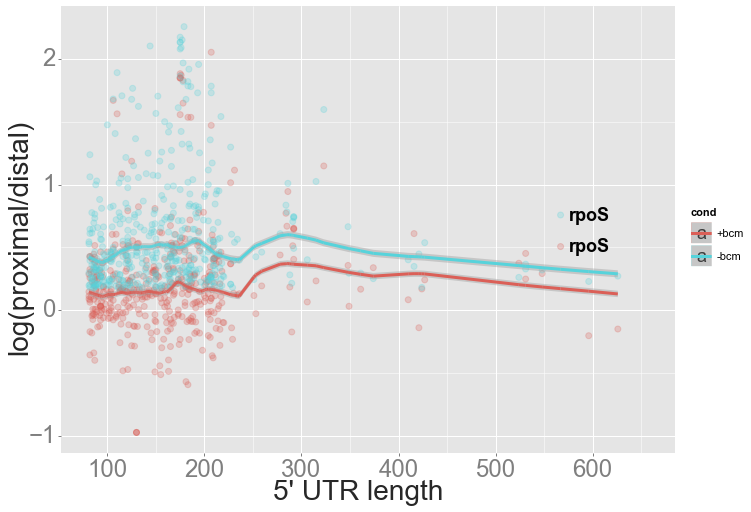

<ggplot: (-9223363288333652245)>


In [12]:
def mark_rho(rec):
    if rec['gene'] == 'rpoS' and rec['UTR_length'] > 500:
        return 'rpoS'
    else:
        return ''

    
    
df15['label'] = df15.apply(mark_rho, axis=1)

p = ggplot(df15[df15['UTR_length'] < 650], aes(x='UTR_length', y='logratio', color='cond', label='label')) \
    + geom_point(alpha=0.25) \
    + geom_text(color="black", nudge_x=30, size=18) \
    + geom_smooth(method='lowess', span=1/5., size=3) \
    + xlab("5' UTR length") \
    + ylab("log(proximal/distal)") \
    + theme(axis_title=element_text(size=28),
            axis_text=element_text(size=24))
print(p)

In [17]:
df15.to_csv('../results/long_utrs.df15.csv')

## Short UTRs

In [13]:
res = []
for i,sample in enumerate(samples_dict):
    df = short_utrs[['UTR_length', 'TSS', 'gene']]
    df['loglen'] = np.log10(df['UTR_length'])
    dtmp = short_utrs[['ratio_{}'.format(bc) for bc in samples_dict[sample]]]
    df['mean_ratio'] = dtmp[['ratio_{}'.format(bc) for bc in samples_dict[sample]]].mean(axis=1)
    df['cond'] = sample
    res.append(df)
    
sdf15 = pd.concat(res)

/home/ilya/.venv/pydata/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ilya/.venv/pydata/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [14]:
sdf15['logratio'] = np.log10(sdf15['mean_ratio'])
sdf15.loc[sdf15.cond == 's9', 'cond'] = '-bcm'
sdf15.loc[sdf15.cond == 's9+bcm', 'cond'] = '+bcm'
sdf15

,UTR_length,TSS,gene,loglen,mean_ratio,cond,logratio
0,42,148,thrL,1.623249,2.179373,+bcm,0.338331
1,42,148,thrL,1.623249,2.179373,+bcm,0.338331
5,58,8017,yaaJ,1.763428,1.560060,+bcm,0.193141
6,47,8191,talB,1.672098,0.765623,+bcm,-0.115985
10,39,11825,yaaI,1.591065,0.471621,+bcm,-0.326407
14,40,12123,dnaK,1.602060,0.725741,+bcm,-0.139218
15,19,12144,dnaK,1.278754,0.820038,+bcm,-0.086166
18,48,16951,hokC,1.681241,0.672355,+bcm,-0.172401
20,31,17458,nhaA,1.491362,0.786798,+bcm,-0.104137
21,42,21120,rpsT,1.623249,0.952871,+bcm,-0.020966


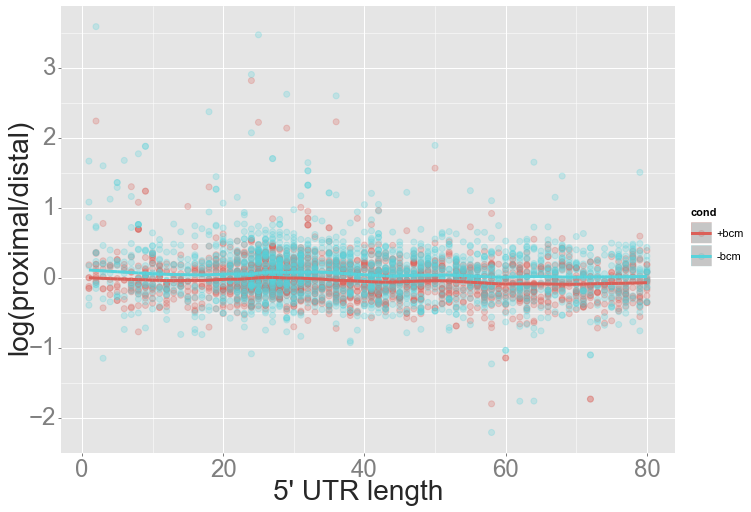

<ggplot: (-9223363288220070270)>


In [26]:
p = ggplot(sdf15, aes(x='UTR_length', y='logratio', color='cond')) \
    + geom_point(alpha=0.25) \
    + geom_smooth(method='lowess', span=1/5., size=3) \
    + xlab("5' UTR length") \
    + ylab("log(proximal/distal)") \
    + theme(axis_title=element_text(size=28),
            axis_text=element_text(size=24))
print(p)